In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy 
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\RAHUL\Downloads\sales_data_with_discounts.csv")
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
data.shape

(450, 13)

In [4]:
data.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [5]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [6]:
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 
                     'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

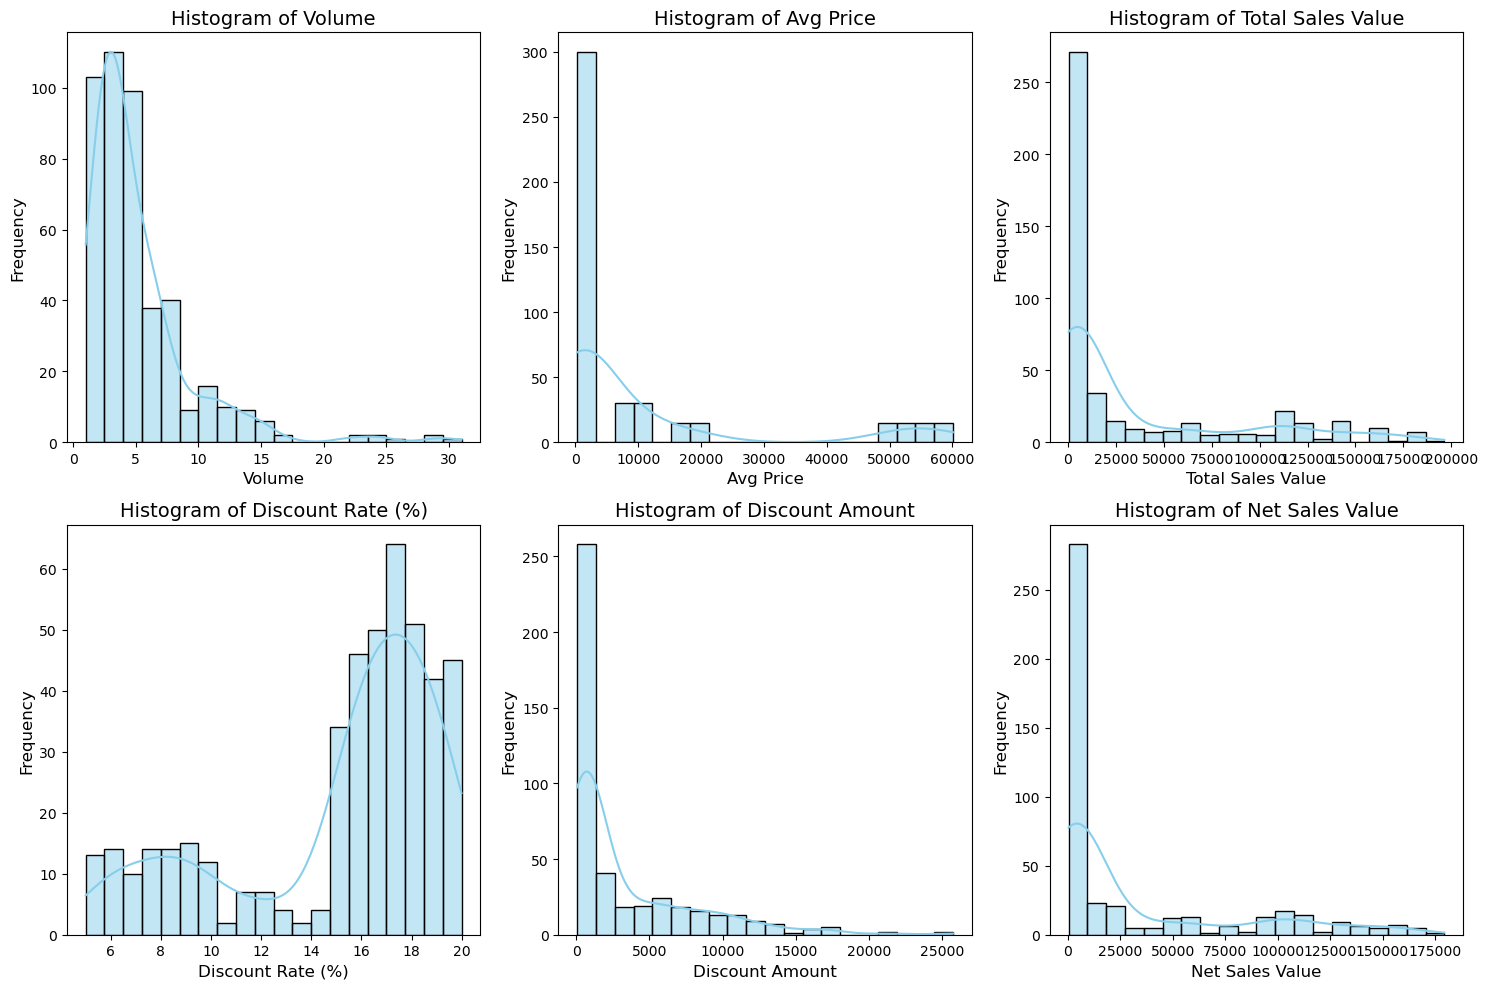

In [7]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[column], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [8]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 
                     'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

In [10]:
for column in numerical_columns:
    print(f"Analysis for column '{column}':")
    print(f"Skewness: {data[column].skew()}")

Analysis for column 'Volume':
Skewness: 2.731723626557714
Analysis for column 'Avg Price':
Skewness: 1.9088730767759727
Analysis for column 'Total Sales Value':
Skewness: 1.5347293238977937
Analysis for column 'Discount Rate (%)':
Skewness: -1.0622943696988825
Analysis for column 'Discount Amount':
Skewness: 1.9130377339538271
Analysis for column 'Net Sales Value':
Skewness: 1.5408217575344376


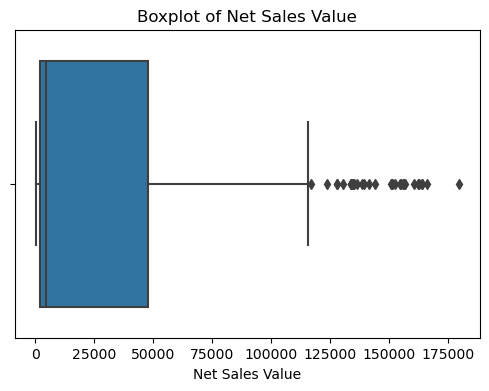

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data[column])
plt.title(f'Boxplot of {column}')
plt.xlabel(column)
plt.show()

In [12]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

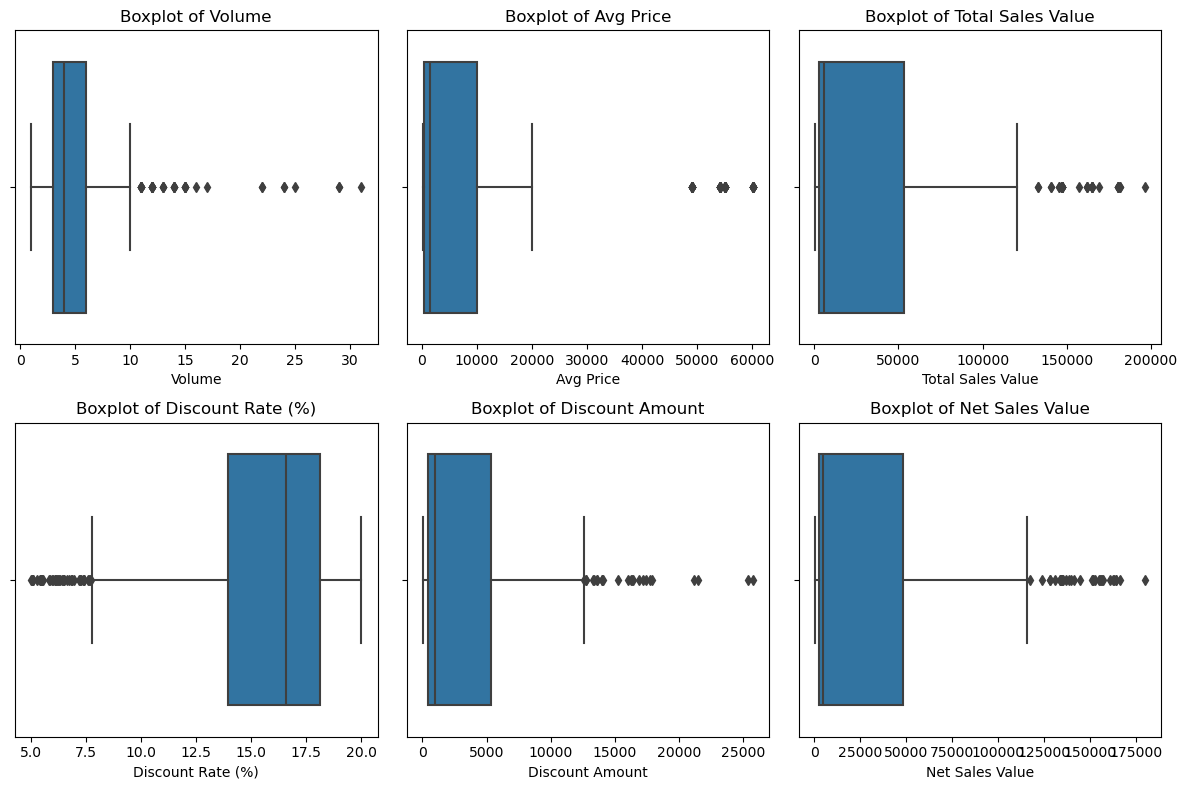

In [13]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [14]:
for column in numerical_columns:
    print(f"Statistics for column '{column}':")
    print(data[column].describe())

Statistics for column 'Volume':
count    450.000000
mean       5.066667
std        4.231602
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       31.000000
Name: Volume, dtype: float64
Statistics for column 'Avg Price':
count      450.000000
mean     10453.433333
std      18079.904840
min        290.000000
25%        465.000000
50%       1450.000000
75%      10100.000000
max      60100.000000
Name: Avg Price, dtype: float64
Statistics for column 'Total Sales Value':
count       450.000000
mean      33812.835556
std       50535.074173
min         400.000000
25%        2700.000000
50%        5700.000000
75%       53200.000000
max      196400.000000
Name: Total Sales Value, dtype: float64
Statistics for column 'Discount Rate (%)':
count    450.000000
mean      15.155242
std        4.220602
min        5.007822
25%       13.965063
50%       16.577766
75%       18.114718
max       19.992407
Name: Discount Rate (%), dtype: float64
Statistics for column 'Dis

In [15]:
data.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [16]:
categorical_columns = ['SKU', 'City', 'BU', 'Brand', 'Model']

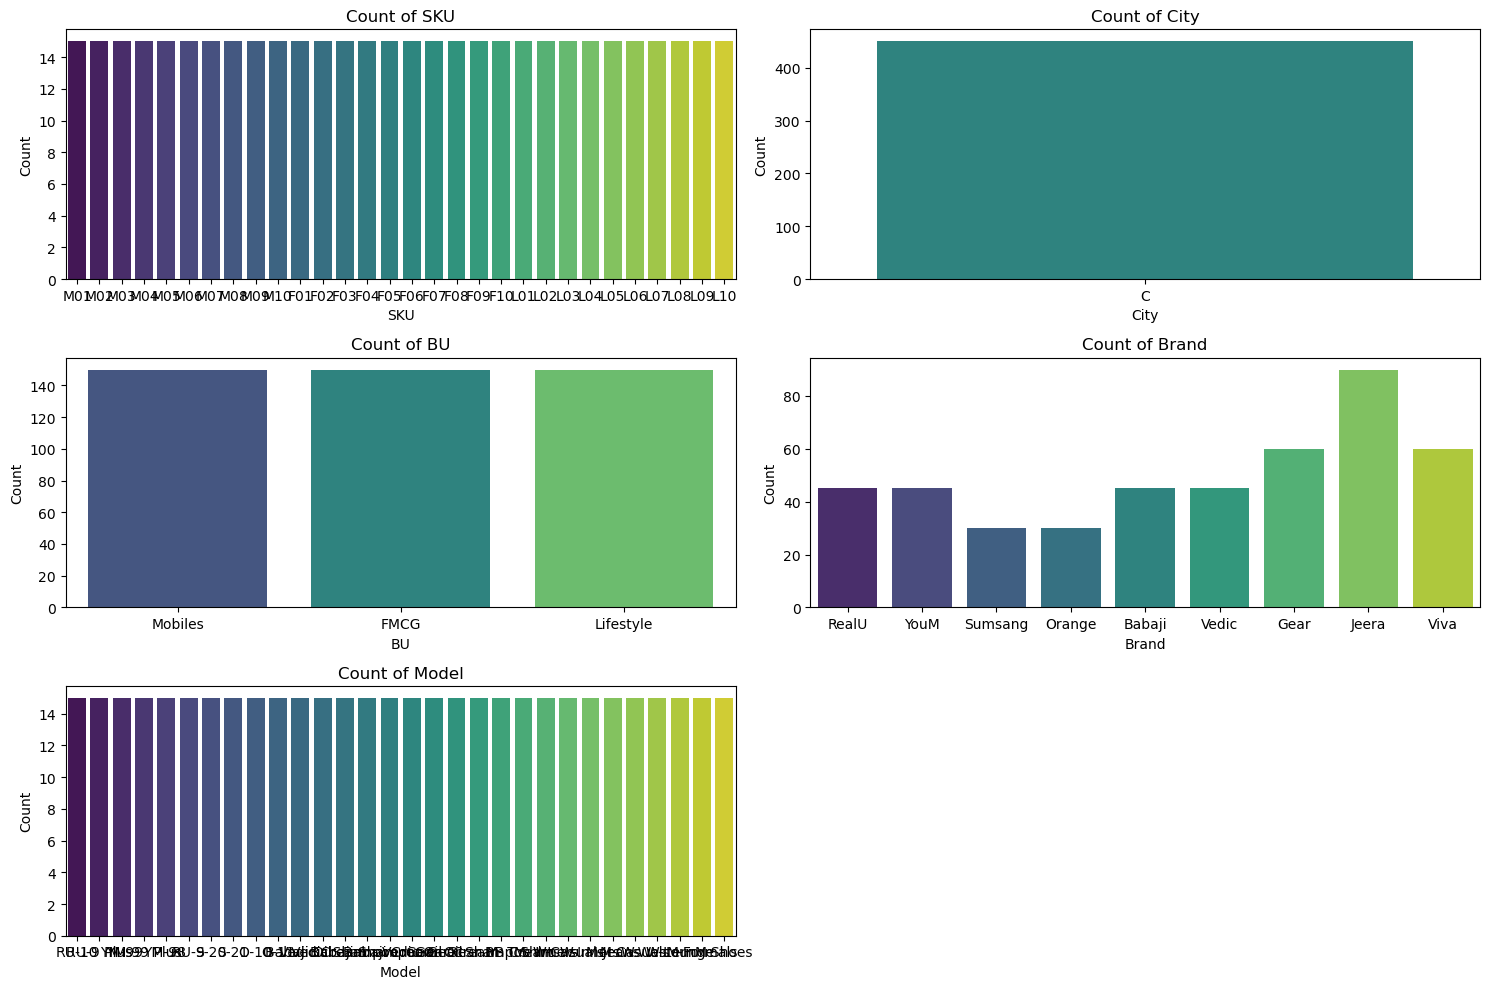

In [17]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=data, x=column, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [18]:
for column in categorical_columns:
    print(f"Distribution of categories in column '{column}':")
    print(data[column].value_counts())
    print()

Distribution of categories in column 'SKU':
SKU
M01    15
M02    15
L09    15
L08    15
L07    15
L06    15
L05    15
L04    15
L03    15
L02    15
L01    15
F10    15
F09    15
F08    15
F07    15
F06    15
F05    15
F04    15
F03    15
F02    15
F01    15
M10    15
M09    15
M08    15
M07    15
M06    15
M05    15
M04    15
M03    15
L10    15
Name: count, dtype: int64

Distribution of categories in column 'City':
City
C    450
Name: count, dtype: int64

Distribution of categories in column 'BU':
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64

Distribution of categories in column 'Brand':
Brand
Jeera      90
Gear       60
Viva       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Sumsang    30
Orange     30
Name: count, dtype: int64

Distribution of categories in column 'Model':
Model
RU-10             15
RU-9 Plus         15
M-Formals         15
W-Lounge          15
W-Western         15
M-Casuals         15
M-Jeans           15
W-Inners   